In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crime_data = pd.read_csv('./crime_data.csv')
zip_to_city = pd.read_csv('./zipcode_to_city.csv')
crime_data.head

<bound method NDFrame.head of      Unnamed: 0 vio_crime  murder_mansl rape robbery agg_assault prop_crime  \
0       Addison        61             1   18       6          36        464   
1        Albany         1             0    1       0           0          6   
2         Aledo         0             0    0       0           0         26   
3        Alexis         0             0    0       0           0         15   
4     Algonquin        27             0    7       4          16        265   
..          ...       ...           ...  ...     ...         ...        ...   
516   Woodstock        24             0   10       2          12        298   
517       Worth        26             0   11       7           8        123   
518  Yates City         1             0    1       0           0          8   
519   Yorkville        18             0    8       3           7        200   
520        Zion       148             4   36      45          63        721   

    burglary lar_thef

In [3]:
list(crime_data)

['Unnamed: 0',
 'vio_crime',
 'murder_mansl',
 'rape',
 'robbery',
 'agg_assault',
 'prop_crime',
 'burglary',
 'lar_theft',
 'car_theft',
 'arson']

In [4]:
zip_to_city.head

<bound method NDFrame.head of       Zip Code               City
0        60001              Alden
1        60002            Antioch
2        60004  Arlington Heights
3        60005  Arlington Heights
4        60006  Arlington Heights
...        ...                ...
1582     62995             Vienna
1583     62996        Villa Ridge
1584     62997        Willisville
1585     62998          Wolf Lake
1586     62999            Zeigler

[1587 rows x 2 columns]>

In [5]:
list(zip_to_city)

['Zip Code', 'City']

In [6]:

# renamed the column Unnamed: 0 to city for crime_data dataframe

# rename -> https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
crime_data.rename(columns = {'Unnamed: 0':'City'}, inplace = True) 

print(zip_to_city.columns)
print('\n')
print(crime_data.columns)

print(crime_data[crime_data.columns[0]])

Index(['Zip Code', 'City'], dtype='object')


Index(['City', 'vio_crime', 'murder_mansl', 'rape', 'robbery', 'agg_assault',
       'prop_crime', 'burglary', 'lar_theft', 'car_theft', 'arson'],
      dtype='object')
0         Addison
1          Albany
2           Aledo
3          Alexis
4       Algonquin
          ...    
516     Woodstock
517         Worth
518    Yates City
519     Yorkville
520          Zion
Name: City, Length: 521, dtype: object


In [7]:

# merged left_on = 'City', right_on = 'City' 

# merge -> https://stackoverflow.com/questions/20375561/joining-pandas-dataframes-by-column-names


crime_by_zip = pd.merge(zip_to_city, crime_data, left_on = 'City', right_on = 'City')
crime_by_zip.fillna(0, inplace=True)
crime_by_zip.head

<bound method NDFrame.head of      Zip Code               City vio_crime  murder_mansl rape robbery  \
0       60002            Antioch        20             0    8       2   
1       60004  Arlington Heights        28             0   10       6   
2       60005  Arlington Heights        28             0   10       6   
3       60006  Arlington Heights        28             0   10       6   
4       60007  Elk Grove Village        23             0    3       9   
..        ...                ...       ...           ...  ...     ...   
715     62948             Herrin        35             0    5       7   
716     62960         Metropolis        33             0    7       2   
717     62966        Murphysboro        53             0    9       4   
718     62984        Shawneetown         5             0    0       0   
719     62995             Vienna         0             0    0       0   

    agg_assault prop_crime burglary lar_theft car_theft  arson  
0            10        165  

In [8]:
coord_file = "us-zip-code-latitude-and-longitude.csv"
coordinates = pd.read_csv(coord_file,sep=';')

In [9]:
print(coordinates)

         Zip        City State   Latitude  Longitude  Timezone  \
0       5769   Salisbury    VT  43.914026 -73.107030        -5   
1       1085   Westfield    MA  42.133642 -72.750290        -5   
2       1340     Colrain    MA  42.673371 -72.731040        -5   
3      25728  Huntington    WV  38.413384 -82.277401        -5   
4      26035    Colliers    WV  40.352943 -80.555850        -5   
...      ...         ...   ...        ...        ...       ...   
43186  50157      Malcom    IA  41.738800 -92.561550        -6   
43187  65212    Columbia    MO  38.937608 -92.330430        -6   
43188  11935   Cutchogue    NY  41.012868 -72.472300        -5   
43189  63539       Ethel    MO  39.893011 -92.745030        -6   
43190  39051    Carthage    MS  32.785139 -89.506440        -6   

       Daylight savings time flag              geopoint  
0                               1   43.914026,-73.10703  
1                               1   42.133642,-72.75029  
2                               1

In [10]:
coordinates.rename(columns = {'Zip':'Zip Code'}, inplace = True) 

In [11]:
print(coordinates)

       Zip Code        City State   Latitude  Longitude  Timezone  \
0          5769   Salisbury    VT  43.914026 -73.107030        -5   
1          1085   Westfield    MA  42.133642 -72.750290        -5   
2          1340     Colrain    MA  42.673371 -72.731040        -5   
3         25728  Huntington    WV  38.413384 -82.277401        -5   
4         26035    Colliers    WV  40.352943 -80.555850        -5   
...         ...         ...   ...        ...        ...       ...   
43186     50157      Malcom    IA  41.738800 -92.561550        -6   
43187     65212    Columbia    MO  38.937608 -92.330430        -6   
43188     11935   Cutchogue    NY  41.012868 -72.472300        -5   
43189     63539       Ethel    MO  39.893011 -92.745030        -6   
43190     39051    Carthage    MS  32.785139 -89.506440        -6   

       Daylight savings time flag              geopoint  
0                               1   43.914026,-73.10703  
1                               1   42.133642,-72.75029

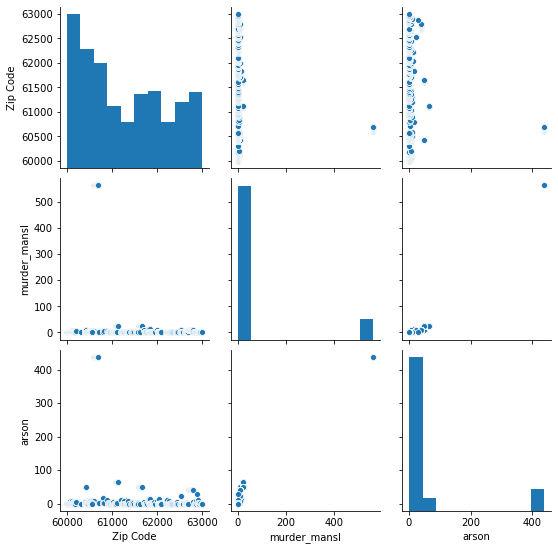

In [12]:
sns.pairplot(crime_by_zip)

In [13]:
crime_coordinates = pd.merge(crime_by_zip, coordinates, how ="left", on = ['Zip Code'])
crime_coordinates.head

<bound method NDFrame.head of      Zip Code             City_x vio_crime  murder_mansl rape robbery  \
0       60002            Antioch        20             0    8       2   
1       60004  Arlington Heights        28             0   10       6   
2       60005  Arlington Heights        28             0   10       6   
3       60006  Arlington Heights        28             0   10       6   
4       60007  Elk Grove Village        23             0    3       9   
..        ...                ...       ...           ...  ...     ...   
715     62948             Herrin        35             0    5       7   
716     62960         Metropolis        33             0    7       2   
717     62966        Murphysboro        53             0    9       4   
718     62984        Shawneetown         5             0    0       0   
719     62995             Vienna         0             0    0       0   

    agg_assault prop_crime burglary lar_theft car_theft  arson  \
0            10        165 

In [14]:
print(crime_coordinates.columns)

Index(['Zip Code', 'City_x', 'vio_crime', 'murder_mansl', 'rape', 'robbery',
       'agg_assault', 'prop_crime', 'burglary', 'lar_theft', 'car_theft',
       'arson', 'City_y', 'State', 'Latitude', 'Longitude', 'Timezone',
       'Daylight savings time flag', 'geopoint'],
      dtype='object')


In [15]:
crime_coordinates.drop(columns=['geopoint', 'Daylight savings time flag', 'Timezone', 'State', 'City_y' ], inplace = True)

In [16]:
crime_coordinates.rename(columns = {'City_x':'City'}, inplace = True) 

In [17]:
print(crime_coordinates.columns)

Index(['Zip Code', 'City', 'vio_crime', 'murder_mansl', 'rape', 'robbery',
       'agg_assault', 'prop_crime', 'burglary', 'lar_theft', 'car_theft',
       'arson', 'Latitude', 'Longitude'],
      dtype='object')
